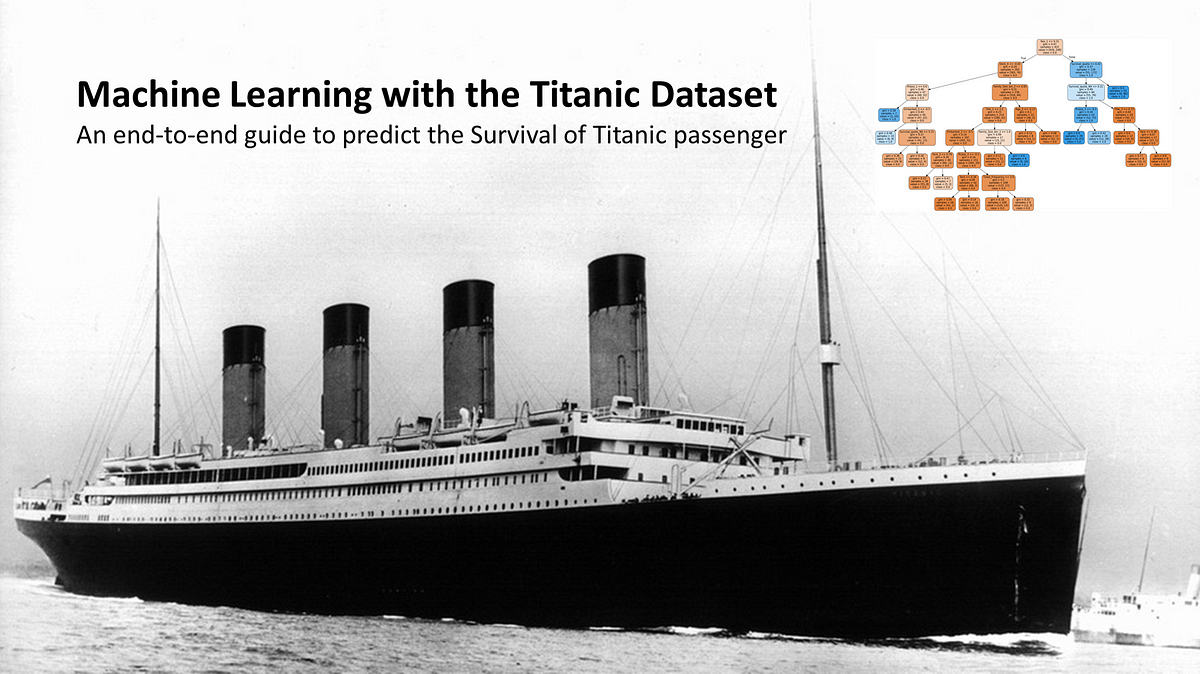

Makine öğrenmesi dünyasının meşhur problemi (bir proje) olan Titanic data seti ile tanışmaya hoş geldiniz arkadaşlar. Bu projemiz bir Kaggle Projesi olup sıklıkla kullanılan bir gerçek dünya data setidir. Data seti ile ilgili açıklamaya alttaki linkten ulaşabilirsiniz.

https://www.kaggle.com/c/titanic/overview

Bu problemde amacımız https://www.kaggle.com/c/titanic/overview linkindeki görevi yerine getirmek.

**Önemli Not:** Kaggle yarışmalarında bazen data,
* train data
* test data
olarak ayrı verilir.

Buradaki test data bizim model oluştururken kullanacağımız test data değildir.

Bu test data Kaggle'in yarışma sonuçları test etmek için kullandığı datadır.

Dolayısı ile bu test data içinde target variable yani gerçek label değeri (grand truth) bulunmaz.

Bu sebeple kendi model doğruluğumuzu ölçerken bu test datayı kullanamayacağınızdan mevcut train data ile train_test_split yaparak kendi test datanızı oluşturmayı unutmayın!

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## ---------------------------- Titanic - Machine Learning from Disaster-----------------------------

## Import Library

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

## Read Data

PassengerId: Yolcu kimlik numarası. Her bir yolcunun veri setindeki benzersiz tanımlayıcısıdır.

Survived: Yolcunun hayatta kalma durumu. 0, hayatta kalmayanları; 1, hayatta kalanları temsil eder.

Pclass: Yolcunun seyahat ettiği yolcu sınıfı. 1, 2 veya 3 olarak kodlanmıştır (1 = 1. sınıf, 2 = 2. sınıf, 3 = 3. sınıf).

Name: Yolcunun adı.

Sex: Yolcunun cinsiyeti. "male" veya "female" olarak kodlanmıştır.

Age: Yolcunun yaşını ifade eder. Bazı değerler eksik olabilir.

SibSp: Yolcunun gemideki eş veya kardeş sayısı.

Parch: Yolcunun gemideki ebeveyn veya çocuk sayısı.

Ticket: Yolcunun bilet numarası.

Fare: Yolcunun bilet ücreti.

Cabin: Yolcunun kabin numarası. Çok fazla eksik değer içerir.

Embarked: Yolcunun gemiye hangi limandan bindiği. "C", "Q" veya "S" olarak kodlanmıştır.

In [2]:
gender_submission = pd.read_csv("gender_submission.csv")

In [3]:
gender_submission.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [4]:
data = pd.read_csv("train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_data = pd.read_csv("test.csv")
test_data.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


# Data Preparation

### gender_submission = gender_submission datası

In [6]:
gender_submission.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [7]:
gender_submission.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [8]:
# Veri setinin genel bir profilini elde etmek için
# Gözlem sayısı-veri tipi-null değer sayısı-unique değer sayısı-min-max değerleri
# null değerler "0" gözüküyor!

def summary(gender_submission, pred=None):
    obs = gender_submission.shape[0]
    Types = gender_submission.dtypes
    Counts = gender_submission.apply(lambda x: x.count())
    Min = gender_submission.min()
    Max = gender_submission.max()
    Uniques = gender_submission.apply(lambda x: x.unique().shape[0])
    Nulls = gender_submission.apply(lambda x: x.isnull().sum())
    print('gender_submission shape:', gender_submission.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\ngender_submission Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(gender_submission)

gender_submission shape: (418, 2)
___________________________
gender_submission Types:
Types
int64    2
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
PassengerId,int64,418,418,0,892,1309
Survived,int64,418,2,0,0,1


### data = train  datası

In [9]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
data[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
data[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
data[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
data.sample(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S


In [16]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data.drop(columns=["Name","Ticket","Cabin","PassengerId"], axis=1, inplace=True)

In [18]:
data.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
272,1,2,female,41.0,0,1,19.5,S


## Exploratory Data Analysis (EDA)

In [19]:
def dataframe_summary(data, columns):  
    
    print("\n",{'-'*80},"\n")
    # Eksik değerleri göster
    print("Eksik Değerler:","\n")
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    print(missing_values)
    
    print("\n",{'-'*80},"\n")
    
    print("Toplam Duplicated sütun sayıları :","\n")
    duplicated = data.duplicated().sum()
    print(duplicated)

        
cat_features = data.select_dtypes(include='object').columns
    
dataframe_summary(data,cat_features)




 {'--------------------------------------------------------------------------------'} 

Eksik Değerler: 

Age         177
Embarked      2
dtype: int64

 {'--------------------------------------------------------------------------------'} 

Toplam Duplicated sütun sayıları : 

111


In [20]:
def dataframe_summary(data, columns):  
    
    print("Sütun isimleri:")
    print(data.columns)
    print("\n",{'-'*80},"\n")    
    
    """Prints unique values and their counts for specific columns in the DataFrame."""
    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*50}")
        unique_vals = data[column_name].unique()
        value_counts = data[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")
        
cat_features = data.select_dtypes(include='object').columns
    
dataframe_summary(data,cat_features)



Sütun isimleri:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

 {'--------------------------------------------------------------------------------'} 

Column: Sex
--------------------------------------------------
Unique Values (2): ['male' 'female']

Value Counts:
Sex
male      577
female    314
Name: count, dtype: int64

Column: Embarked
--------------------------------------------------
Unique Values (4): ['S' 'C' 'Q' nan]

Value Counts:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



In [21]:
def summary(data):
    obs = data.shape[0]
    Types = data.dtypes
    Counts = data.apply(lambda x: x.count())
    Uniques = data.apply(lambda x: x.unique().shape[0])
    Nulls = data.apply(lambda x: x.isnull().sum())
    
    # Sadece sayısal sütunları seç
    numeric_data = data.select_dtypes(include=['int', 'float'])
    Min = numeric_data.min()
    Max = numeric_data.max()
    
    print('Data shape:', data.shape)

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis=1, sort=True)
    str.columns = cols

    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(data)


Data shape: (891, 8)
___________________________
Data Types:
Types
int64      4
float64    2
object     2
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,float64,714,89,177,0.42,80.0000
Embarked,object,889,4,2,NaN,NaN
Fare,float64,891,248,0,0.00,512.3292
Parch,int64,891,7,0,0.00,6.0000
Pclass,int64,891,3,0,1.00,3.0000
Sex,object,891,2,0,NaN,NaN
SibSp,int64,891,7,0,0.00,8.0000
Survived,int64,891,2,0,0.00,1.0000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
data["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
data["Age"].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
35.00    18
27.00    18
26.00    18
16.00    17
31.00    17
20.00    15
34.00    15
33.00    15
23.00    15
39.00    14
40.00    13
17.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
44.00     9
48.00     9
47.00     9
54.00     8
9.00      8
1.00      7
51.00     7
14.00     6
52.00     6
37.00     6
49.00     6
41.00     6
3.00      6
58.00     5
15.00     5
43.00     5
62.00     4
56.00     4
5.00      4
11.00     4
60.00     4
8.00      4
6.00      3
46.00     3
61.00     3
65.00     3
7.00      3
10.00     2
64.00     2
13.00     2
63.00     2
30.50     2
57.00     2
70.00     2
0.75      2
71.00     2
59.00     2
0.83      2
40.50     2
55.00     2
32.50     2
28.50     2
45.50     2
34.50     1
0.42      1
0.67      1
66.00     1
24.50     1
80.00     1
20.50     1
53.00     1
14.50     1
70.50     1
12.00     1


In [25]:
data['Age'].ffill(inplace=True)

In [26]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
data['Embarked'].ffill(inplace=True)

In [29]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.581560,14.554590,0.42,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [31]:
data.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
399,1,2,female,28.0,0,0,12.65,S


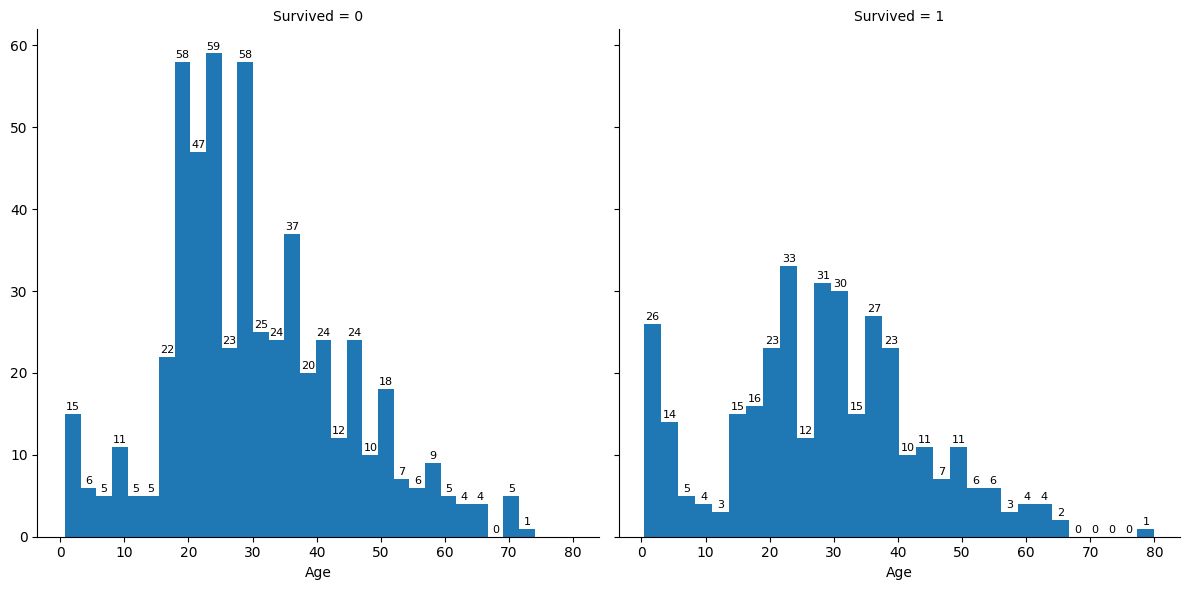

In [32]:
g = sns.FacetGrid(data, col='Survived', height=6)
g.map(plt.hist, 'Age', bins=30)

# Histogramlar üzerinde sayıları göstermek için annotate fonksiyonunu kullanıyoruz
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.show()


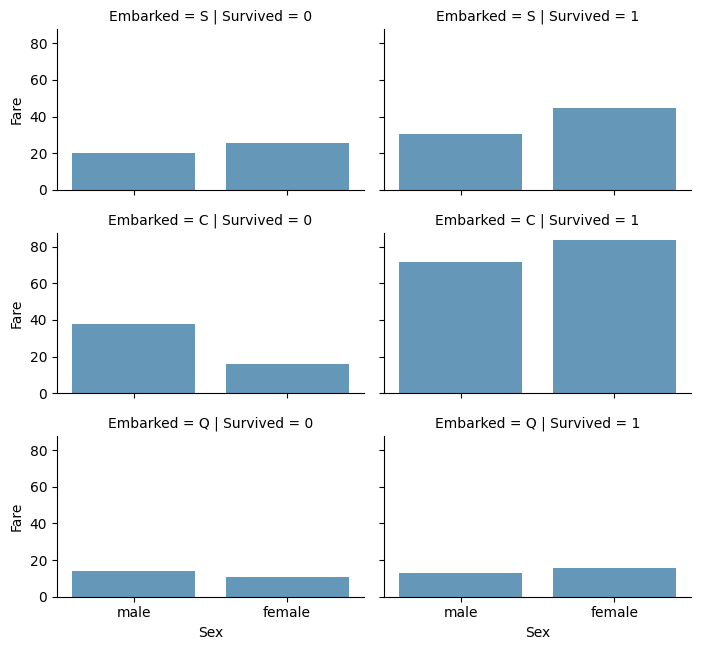

In [33]:
grid = sns.FacetGrid(data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.75, ci=None)
grid.add_legend()

Survived
0    549
1    342
Name: count, dtype: int64
---------------------
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
---------------------


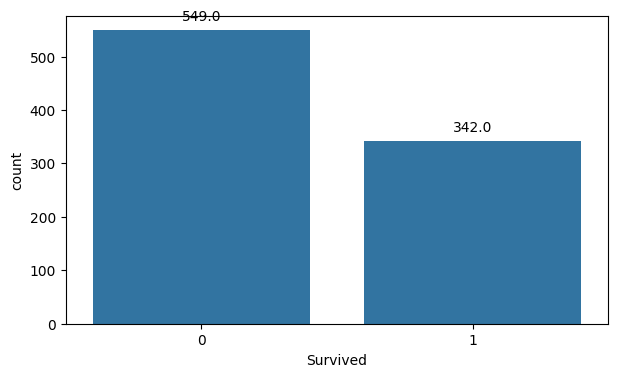

In [34]:

def target_info(target):
    print(target.value_counts())
    print("---------------------")
    print(target.value_counts(normalize=True))
    print("---------------------")

    ax = sns.countplot(x=target.name, data=target.to_frame())
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

target_info(data["Survived"])

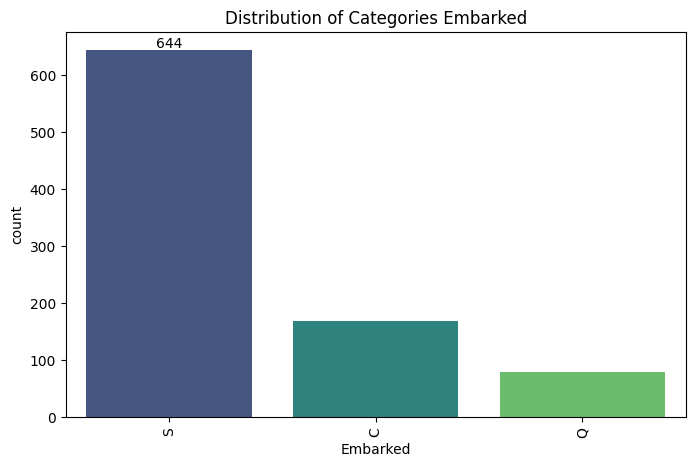

In [35]:
categor = data.select_dtypes("object").columns 

for i, column in enumerate(categor):
    # Sadece 1. ve 3. sıradaki sütunlar için devam et
    if i == 0 or i == 2:
        continue
    
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Distribution of Categories {column}')

    # Barlar üzerindeki sayımları otomatik olarak etiketle
    ax.bar_label(ax.containers[0])
    
    plt.xticks(rotation=90)
    plt.show()


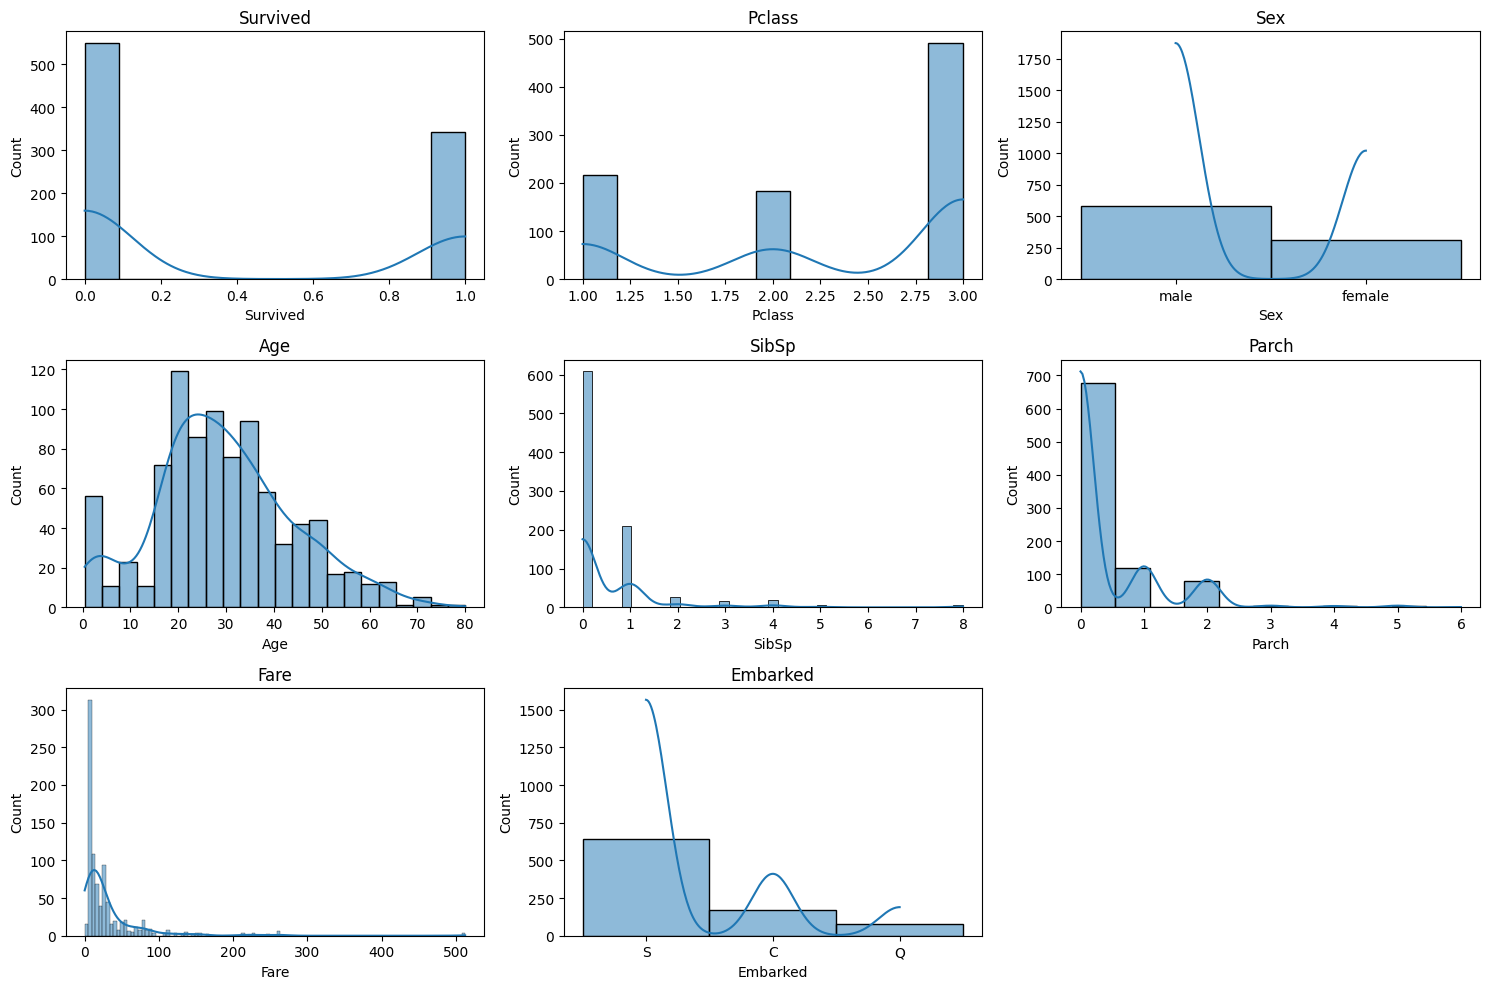

In [36]:
plt.figure(figsize=(15,10))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)  # 3x3 grid'de her sütun için subplot oluşturuldu
    sns.histplot(data[column], kde=True)  # Histogram plotunu çizme
    plt.title(column)  # Her subplot için başlık ekleme

plt.tight_layout()  # Grafiklerin düzenini ayarlama
plt.show()

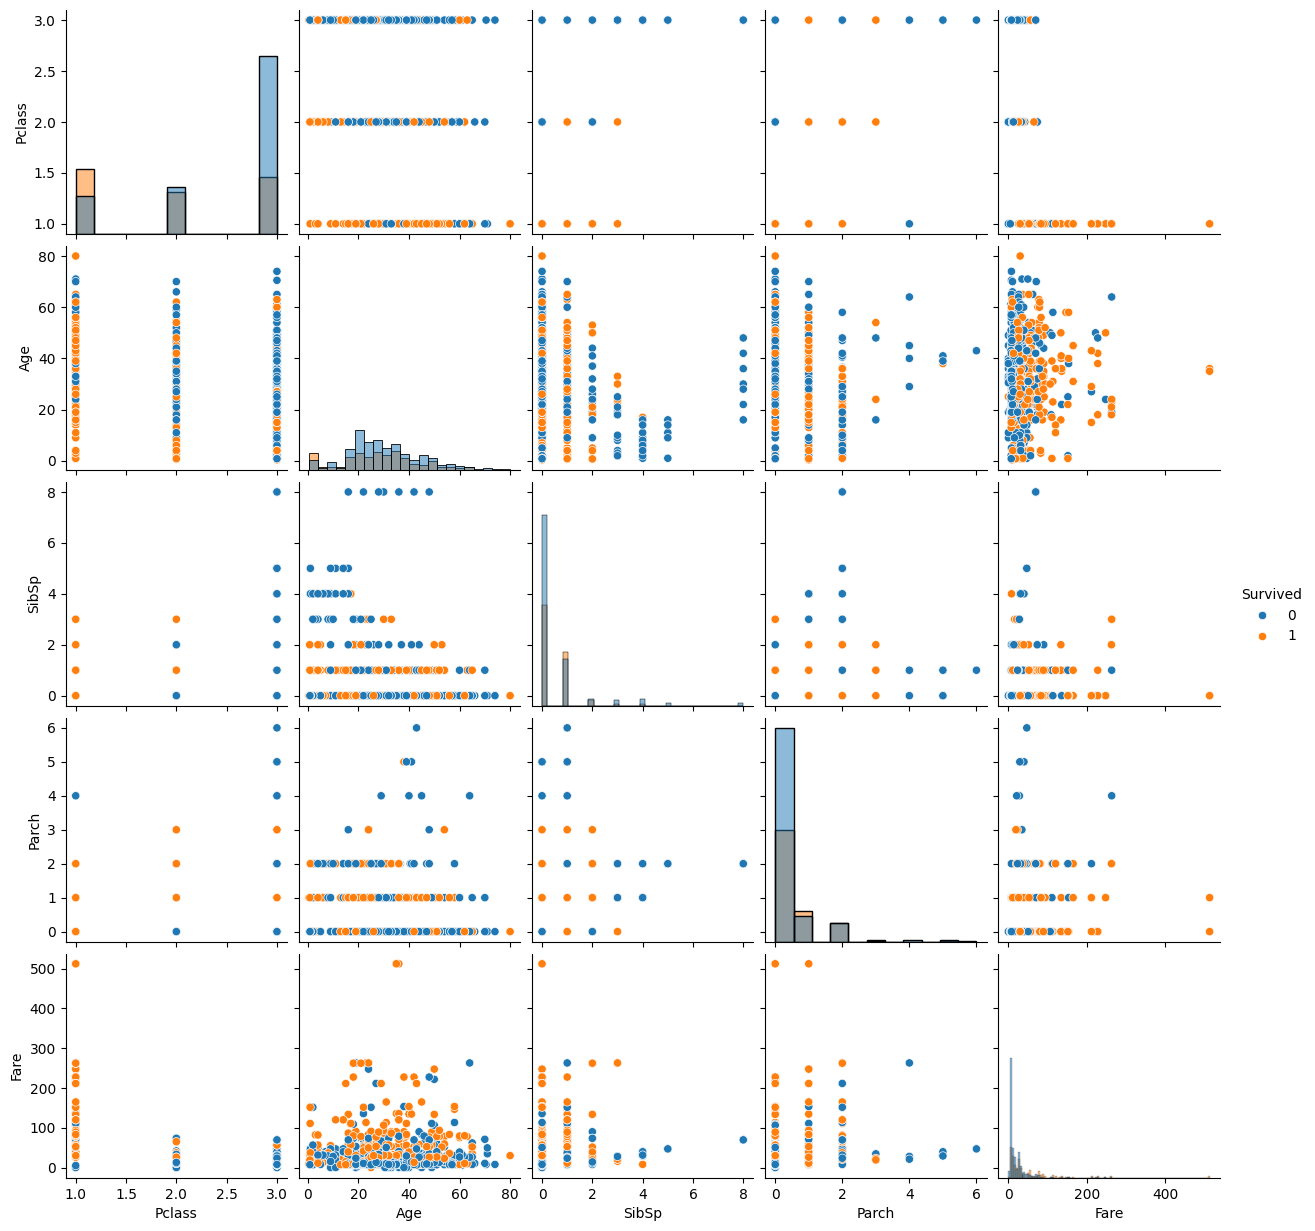

In [37]:
sns.pairplot(data, hue='Survived', diag_kind='hist')
plt.show()

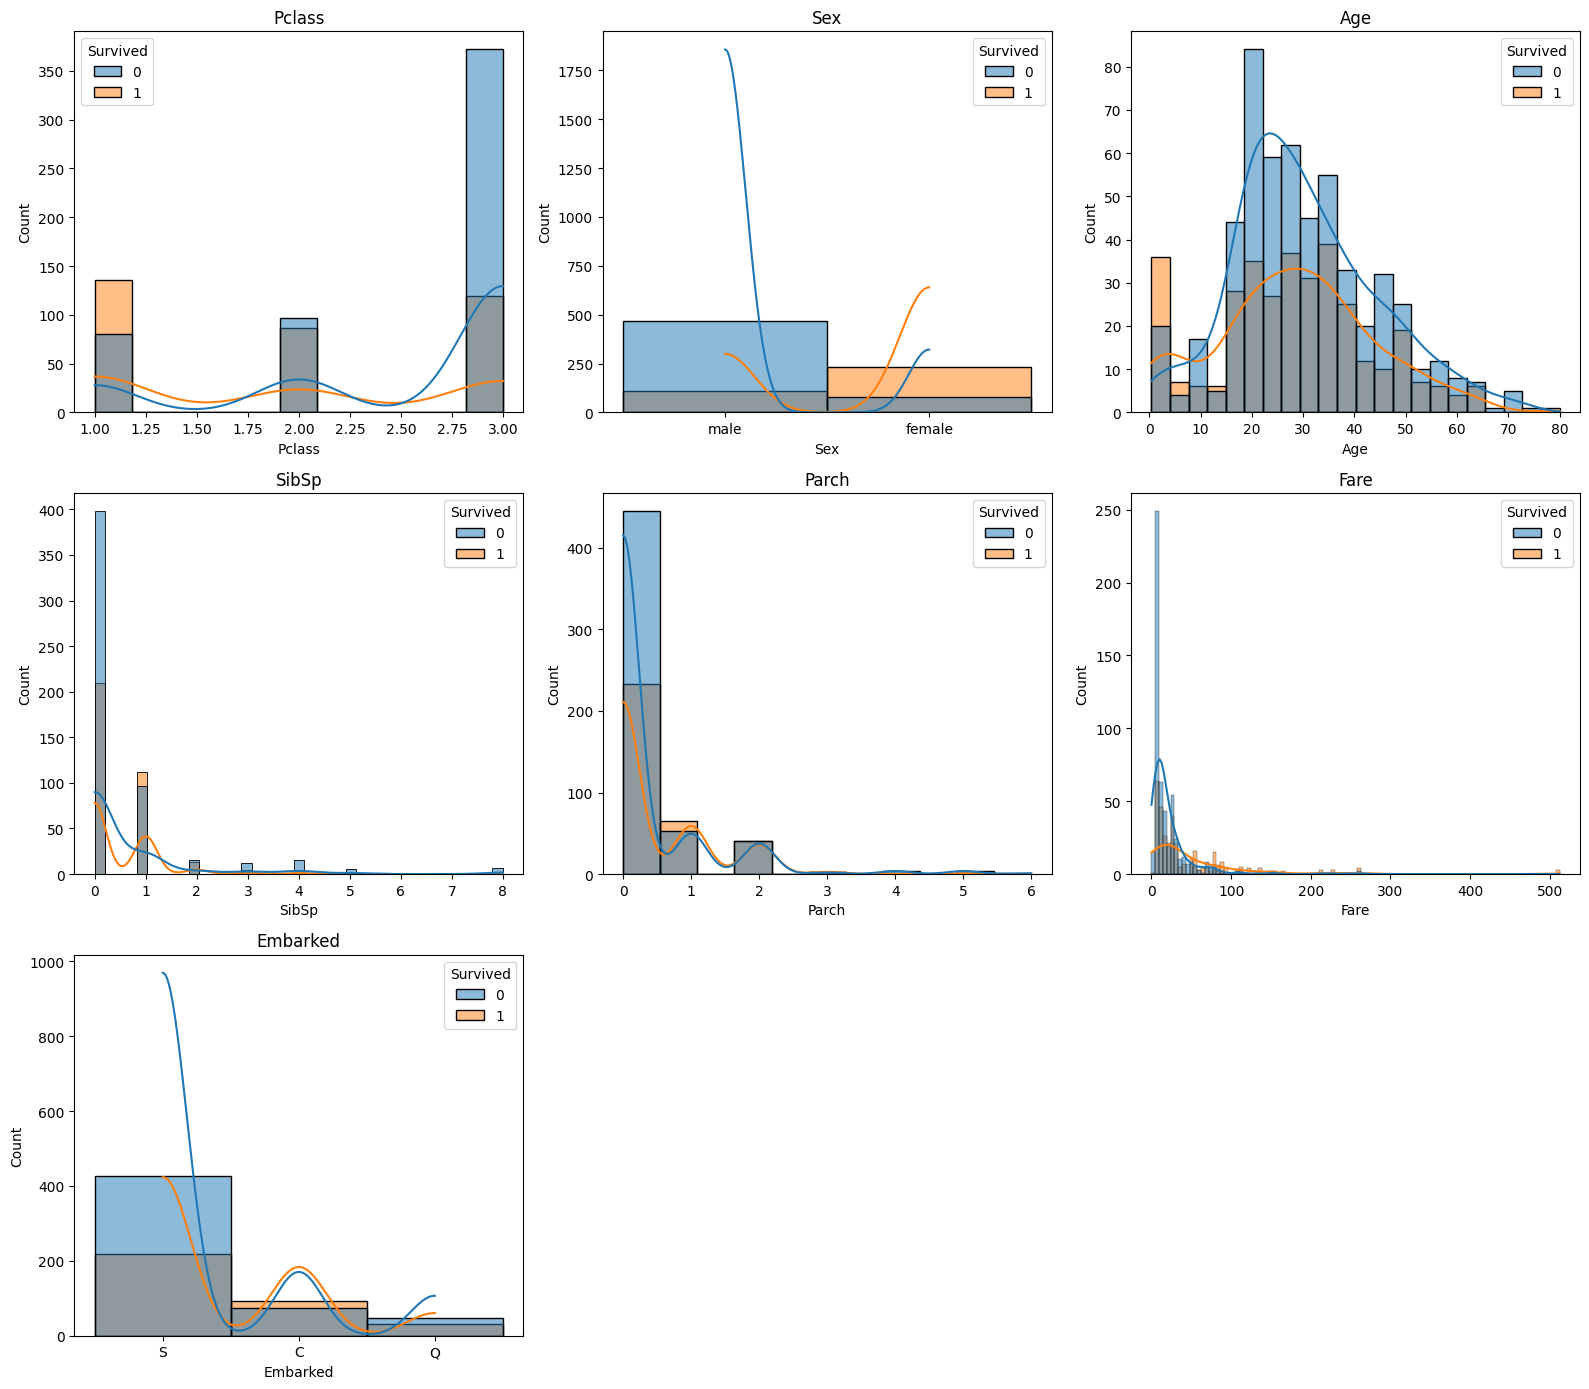

In [38]:
plt.figure(figsize=(16,14))
for i, column in enumerate(data.columns):
    if column != 'Survived':  # 'Survived' sütununu döngüden geçme
        plt.subplot(3, 3, i)  # 3x3 grid'de her sütun için subplot oluşturuldu
        sns.histplot(data=data, x=column, hue='Survived', kde=True)
        plt.title(column)  # Her subplot için başlık ekleme

plt.tight_layout()  # Grafiklerin düzenini ayarlama
plt.show()

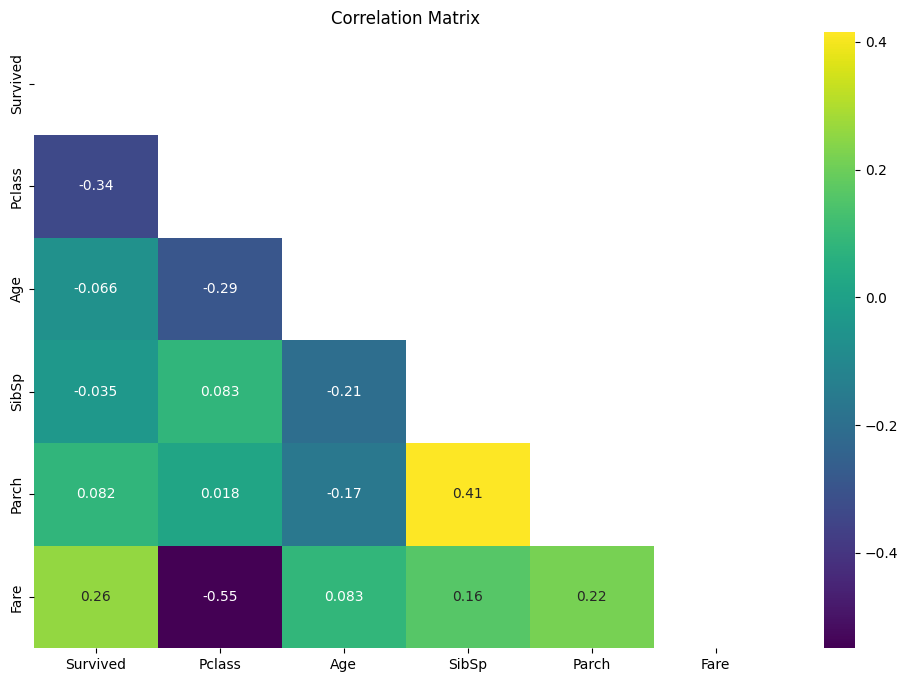

In [39]:
plt.figure(figsize=(12,8))
correlation_matrix = data.select_dtypes("number").corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data.select_dtypes("number").corr(),annot=True, cmap='viridis',mask=mask)
plt.title("Correlation Matrix")

plt.show()

In [40]:
data.sample(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
51,0,3,male,21.0,0,0,7.8,S


In [41]:
def summary(data):
    obs = data.shape[0]
    Types = data.dtypes
    Counts = data.apply(lambda x: x.count())
    Uniques = data.apply(lambda x: x.unique().shape[0])
    Nulls = data.apply(lambda x: x.isnull().sum())
    
    # Sadece sayısal sütunları seç
    numeric_data = data.select_dtypes(include=['int', 'float'])
    Min = numeric_data.min()
    Max = numeric_data.max()
    
    print('Data shape:', data.shape)

    cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
    str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis=1, sort=True)
    str.columns = cols

    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    return str

summary(data)


Data shape: (891, 8)
___________________________
Data Types:
Types
int64      4
float64    2
object     2
Name: count, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
Age,float64,891,88,0,0.42,80.0000
Embarked,object,891,3,0,NaN,NaN
Fare,float64,891,248,0,0.00,512.3292
Parch,int64,891,7,0,0.00,6.0000
Pclass,int64,891,3,0,1.00,3.0000
Sex,object,891,2,0,NaN,NaN
SibSp,int64,891,7,0,0.00,8.0000
Survived,int64,891,2,0,0.00,1.0000


## Train | Test Split

In [42]:
X = data.drop("Survived", axis = 1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, stratify=y, random_state = 101)

## Modelling | Model Performance

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier

In [44]:
#object_columns = data.select_dtypes(include=['object']).columns
object_columns = ["Sex","Embarked"]
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

preprocessor=ColumnTransformer(
    transformers = [
            ("scaler", StandardScaler(),numeric_columns),
            ("onehot_encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False),object_columns),
    ]
)



## BaggingClassifier

In [45]:
BaggingClassifier_model = Pipeline([
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', BaggingClassifier(random_state=101))  # Lojistik Regresyon modeli
])

In [46]:
BaggingClassifier_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', BaggingClassifier(random_state=101))])

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
def eval_metric(BaggingClassifier_model, X_train, y_train, X_test, y_test):
    y_train_pred = BaggingClassifier_model.predict(X_train)
    y_pred = BaggingClassifier_model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
eval_metric(BaggingClassifier_model, X_train, y_train, X_test, y_test)


Test_Set
[[48  7]
 [14 21]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.75      0.60      0.67        35

    accuracy                           0.77        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.77      0.76        90


Train_Set
[[488   6]
 [ 18 289]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       494
           1       0.98      0.94      0.96       307

    accuracy                           0.97       801
   macro avg       0.97      0.96      0.97       801
weighted avg       0.97      0.97      0.97       801



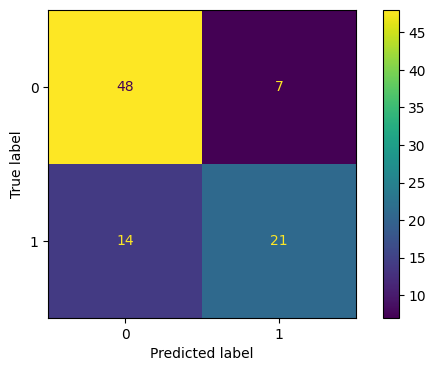

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(BaggingClassifier_model, X_test, y_test);

[TN][FP]

[FN][TP]

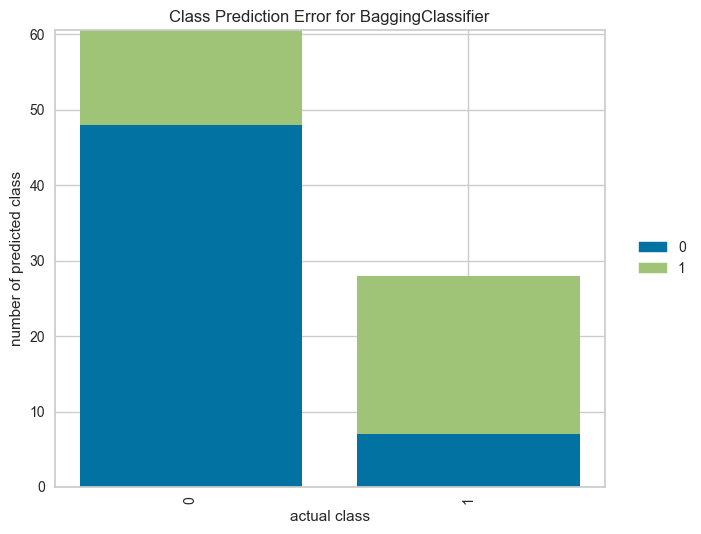

In [49]:
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(BaggingClassifier_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

#classpredictionerror fonksiyonu class bazında yapılan hataları gösteriyor.

## BaggingClassifier CV

In [50]:
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score, make_scorer

pipe_model = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', BaggingClassifier(random_state=42))  
])


scores = cross_validate(pipe_model, X_train, y_train, scoring={"accuracy": "accuracy", "precision": make_scorer(precision_score, average="macro"), "recall": make_scorer(recall_score, average="macro"), "f1": make_scorer(f1_score, average="macro")}, cv=10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]  



test_accuracy      0.800278
train_accuracy     0.976696
test_precision     0.794324
train_precision    0.979293
test_recall        0.779542
train_recall       0.971588
test_f1            0.784494
train_f1           0.975155
dtype: float64

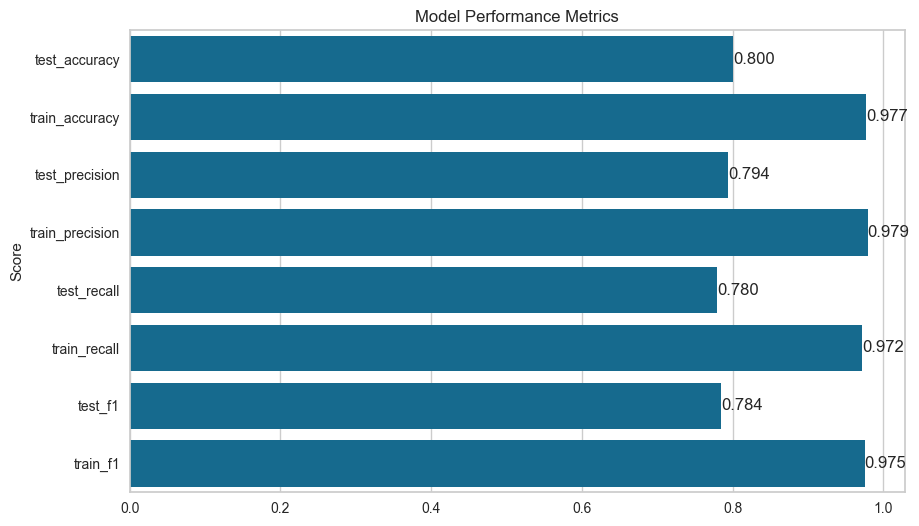

In [51]:
mean_scores = pd.DataFrame(scores).mean()[2:]

plt.figure(figsize=(10, 6))
ax = sns.barplot(y=mean_scores.index, x=mean_scores.values)
ax.bar_label(ax.containers[0], fmt='%.3f')
plt.ylabel('Score')
plt.title('Model Performance Metrics');

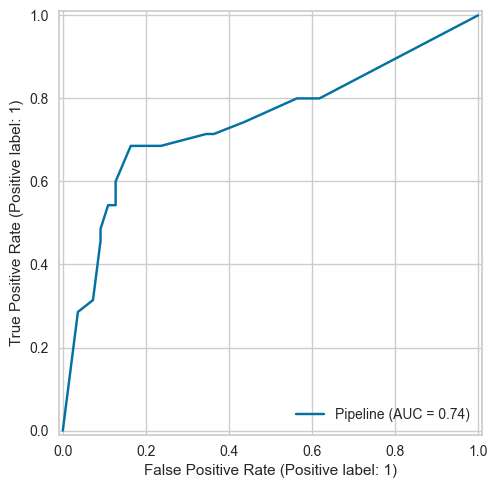

In [52]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(BaggingClassifier_model, X_test, y_test);

In [54]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [55]:
y_pred = BaggingClassifier_model.predict(X_test)
BaggingClassifier_model_R2 = r2_score(y_test, y_pred)
BaggingClassifier_model_mae = mean_absolute_error(y_test, y_pred)
BaggingClassifier_model_mse = mean_squared_error(y_test, y_pred)
BaggingClassifier_model_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_val(BaggingClassifier_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.873241,0.018182
mae,0.029963,0.233333
mse,0.029963,0.233333
rmse,0.173097,0.483046


## AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [57]:
object_columns = ["Sex","Embarked"]
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

preprocessor=ColumnTransformer(
    transformers = [
            ("scaler", StandardScaler(),numeric_columns),
            ("onehot_encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False),object_columns),
    ]
)

AdaBoostClass_model = Pipeline([
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', AdaBoostClassifier(random_state=101))  
])

In [58]:
AdaBoostClass_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', AdaBoostClassifier(random_state=101))])

In [59]:
eval_metric(AdaBoostClass_model, X_train, y_train, X_test, y_test)

Test_Set
[[45 10]
 [13 22]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        55
           1       0.69      0.63      0.66        35

    accuracy                           0.74        90
   macro avg       0.73      0.72      0.73        90
weighted avg       0.74      0.74      0.74        90


Train_Set
[[437  57]
 [ 66 241]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       494
           1       0.81      0.79      0.80       307

    accuracy                           0.85       801
   macro avg       0.84      0.83      0.84       801
weighted avg       0.85      0.85      0.85       801



In [60]:
from sklearn.model_selection import cross_val_score, cross_validate

AdaBoostClass_model = Pipeline([
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', AdaBoostClassifier(n_estimators=50,random_state=101))  
])
scores = cross_validate(AdaBoostClass_model,
                        X_train,
                        y_train,
                        scoring=["accuracy", "precision", "recall", "f1"],
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.807809
train_accuracy     0.840616
test_precision     0.753925
train_precision    0.798963
test_recall        0.749677
train_recall       0.781026
test_f1            0.750196
train_f1           0.789742
dtype: float64

In [61]:
AdaBoostClass_model.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                    Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                   ('onehot_encoder',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Sex', 'Embarked'])])),
  ('classifier', AdaBoostClassifier(random_state=101))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                 ('onehot_encoder',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                

In [62]:
# Sütunları türlerine göre gruplayın
from sklearn.model_selection import GridSearchCV


# Pipeline ve ColumnTransformer oluşturun
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=50,random_state=101))  # BaggingClassifier'ı burada belirleyin
])

# Parametre gridi tanımlayın
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.5, 1]
}

# Scorer'ı tanımlayın
scorer = make_scorer(f1_score, average='macro')

# GridSearchCV modelini oluşturun
AdaBoostClass_model_Grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=10,
    scoring=scorer,
    return_train_score=True,
    n_jobs=-1
)

In [63]:
AdaBoostClass_model_Grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         StandardScaler(),
                                                                         Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                                        ('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Sex',
                                                                          'Embarked'])])),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=101))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.5, 1],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [64]:
eval_metric(AdaBoostClass_model_Grid, X_train, y_train, X_test, y_test)

Test_Set
[[48  7]
 [14 21]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.75      0.60      0.67        35

    accuracy                           0.77        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.77      0.76        90


Train_Set
[[424  70]
 [ 67 240]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       494
           1       0.77      0.78      0.78       307

    accuracy                           0.83       801
   macro avg       0.82      0.82      0.82       801
weighted avg       0.83      0.83      0.83       801



In [65]:
AdaBoostClass_model_Grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                    random_state=101))])

In [66]:
AdaBoostClass_model_Grid.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}

In [67]:
AdaBoostClass_model_Grid.best_score_

0.8069462990134569

In [68]:
y_pred = AdaBoostClass_model_Grid.predict(X_test)
y_pred_proba = AdaBoostClass_model_Grid.predict_proba(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred_proba[:,1])
eval_metric(AdaBoostClass_model_Grid, X_train, y_train, X_test, y_test)

Test_Set
[[48  7]
 [14 21]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        55
           1       0.75      0.60      0.67        35

    accuracy                           0.77        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.77      0.76        90


Train_Set
[[424  70]
 [ 67 240]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       494
           1       0.77      0.78      0.78       307

    accuracy                           0.83       801
   macro avg       0.82      0.82      0.82       801
weighted avg       0.83      0.83      0.83       801



In [69]:
y_pred = AdaBoostClass_model_Grid.predict(X_test)

ada_R2 = r2_score(y_test, y_pred)
ada_mae = mean_absolute_error(y_test, y_pred)
ada_mse = mean_squared_error(y_test, y_pred)
ada_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_val(AdaBoostClass_model_Grid, X_train, y_train, X_test, y_test)

,train,test
R2,0.276418,0.018182
mae,0.171036,0.233333
mse,0.171036,0.233333
rmse,0.413565,0.483046


## Feature Importances

In [70]:

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

# Pipeline oluşturulması
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=50, random_state=101))  # BaggingClassifier'ı burada belirleyin
])

# Modelin eğitilmesi
model.fit(X_train, y_train)

# Özellik önemlerinin alınması
ada_feature_importances = model.named_steps['classifier'].feature_importances_

# Özellik önemlerinin bir DataFrame'e dönüştürülmesi
feats = pd.DataFrame(data=ada_feature_importances, index=data.columns, columns=['ada_importance'])

# Özellik önemlerinin sıralanması
ada_imp_feats = feats.sort_values("ada_importance", ascending=False)
ada_imp_feats

,ada_importance
SibSp,0.48
Pclass,0.30
Sex,0.08
Parch,0.06
Survived,0.04
Age,0.02
Embarked,0.02
Fare,0.00


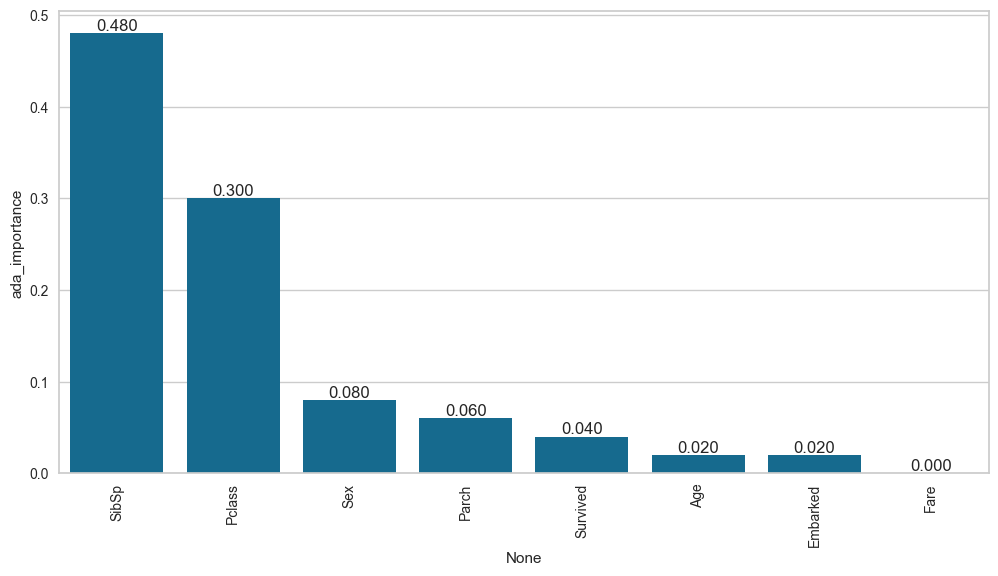

In [71]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_importance')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

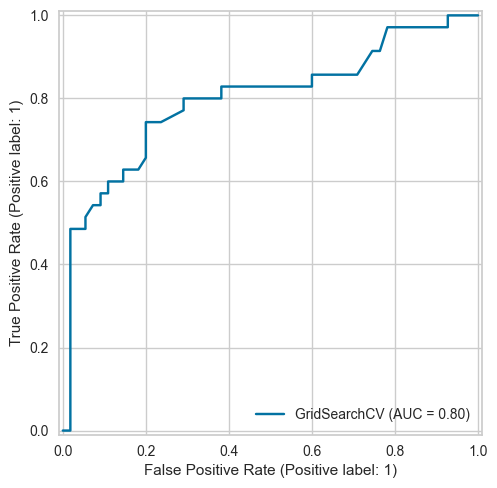

In [72]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(AdaBoostClass_model_Grid, X_test, y_test);

## Gradient Boosting Modelling and Model Performance

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
object_columns = ["Sex","Embarked"]
numeric_columns = X.select_dtypes(include=['int', 'float']).columns

preprocessor=ColumnTransformer(
    transformers = [
            ("scaler", StandardScaler(),numeric_columns),
            ("onehot_encoder", OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False),object_columns),
    ]
)

GradientBoostingClassifier_model = Pipeline([
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', GradientBoostingClassifier(random_state=101))  
])

In [75]:
GradientBoostingClassifier_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', GradientBoostingClassifier(random_state=101))])

In [76]:
eval_metric(GradientBoostingClassifier_model, X_train, y_train, X_test, y_test)

Test_Set
[[52  3]
 [12 23]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        55
           1       0.88      0.66      0.75        35

    accuracy                           0.83        90
   macro avg       0.85      0.80      0.81        90
weighted avg       0.84      0.83      0.83        90


Train_Set
[[468  26]
 [ 67 240]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       494
           1       0.90      0.78      0.84       307

    accuracy                           0.88       801
   macro avg       0.89      0.86      0.87       801
weighted avg       0.89      0.88      0.88       801



## GradientBoostingClassifier CV

In [77]:

GradientBoostingClassifier_CV_model = Pipeline([
    ('preprocessor', preprocessor),  # Önişleme adımı
    ('classifier', GradientBoostingClassifier(random_state=101))  
])


scores = cross_validate(
    GradientBoostingClassifier_CV_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.813981
train_accuracy     0.898599
test_precision     0.801270
train_precision    0.912401
test_recall        0.693763
train_recall       0.813597
test_f1            0.741147
train_f1           0.860065
test_roc_auc       0.870059
train_roc_auc      0.954372
dtype: float64

## GradientBoostingClassifier Gridsearch

In [78]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=101))
])

params = pipeline.get_params()
print(params)


{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehot_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'Embarked'])])), ('classifier', GradientBoostingClassifier(random_state=101))], 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('onehot_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                      

In [79]:
param_grid = {
    'classifier__learning_rate': [0.05, 0.1, 0.2],
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 0.9, 1.0]
}


In [80]:
GradientBoostingClassifier_grid = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=101))
])

grid = GridSearchCV(GradientBoostingClassifier_grid, param_grid, scoring= "f1", verbose=2).fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=50, classifier__subsample=0.9; total time=   0.0s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=3, classifier__n_estimators=5

[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   0.3s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=0.9; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier__learning_rate=0.05, classifier__max_depth=5, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.2s
[CV] E

In [81]:
grid.best_params_

{'classifier__learning_rate': 0.05,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 50,
 'classifier__subsample': 0.8}

In [82]:
grid.best_score_

0.7585388623072834

In [83]:
grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('onehot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=5,
                                            n_estimators=50, random_state=101,
                                            subsample=0.8))])

In [84]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

Test_Set
[[52  3]
 [14 21]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        55
           1       0.88      0.60      0.71        35

    accuracy                           0.81        90
   macro avg       0.83      0.77      0.79        90
weighted avg       0.82      0.81      0.80        90


Train_Set
[[478  16]
 [ 61 246]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       494
           1       0.94      0.80      0.86       307

    accuracy                           0.90       801
   macro avg       0.91      0.88      0.90       801
weighted avg       0.91      0.90      0.90       801



In [85]:
y_pred = grid.predict(X_test)
grad_R2 = r2_score(y_test, y_pred)
grad_mae = mean_absolute_error(y_test, y_pred)
grad_mse = mean_squared_error(y_test, y_pred)
grad_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_val(grid, X_train, y_train, X_test, y_test)

,train,test
R2,0.593315,0.205195
mae,0.096130,0.188889
mse,0.096130,0.188889
rmse,0.310048,0.434613


## Feature Importances

In [86]:

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

# Pipeline oluşturulması
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=50,
                           random_state=101, subsample=0.8))
])

# Modelin eğitilmesi
model.fit(X_train, y_train)

# Özellik önemlerinin alınması
GradientBoostingClassifier = model.named_steps['classifier'].feature_importances_

# Özellik önemlerinin bir DataFrame'e dönüştürülmesi
feats = pd.DataFrame(data=GradientBoostingClassifier, index=data.columns, columns=['GradientBoostingClassifier'])

# Özellik önemlerinin sıralanması
GradientBoostingClassifier = feats.sort_values("GradientBoostingClassifier", ascending=False)
GradientBoostingClassifier

,GradientBoostingClassifier
Parch,0.418614
SibSp,0.213721
Pclass,0.146968
Survived,0.133738
Sex,0.039377
Age,0.030779
Embarked,0.011902
Fare,0.004901


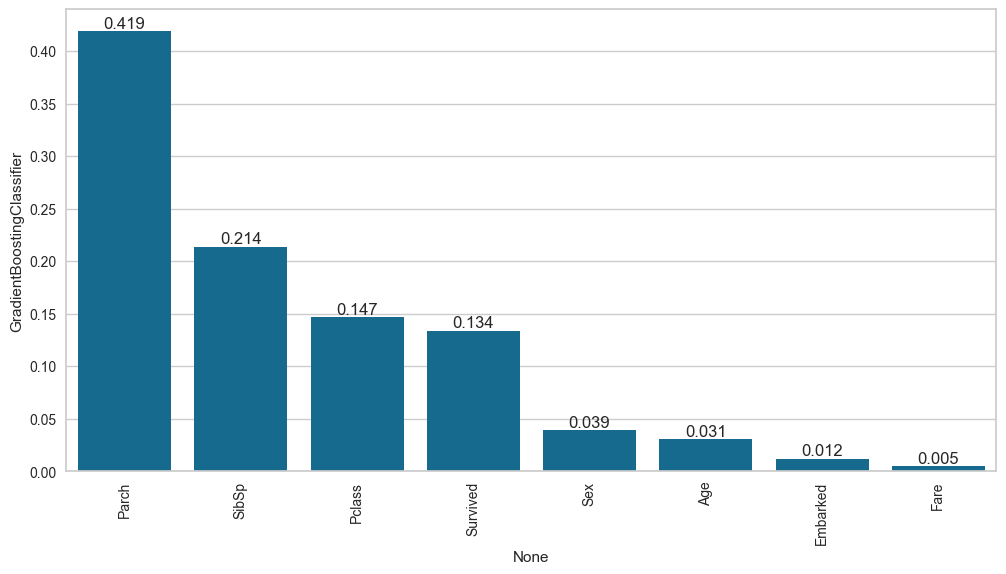

In [87]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=GradientBoostingClassifier, x=GradientBoostingClassifier.index, y='GradientBoostingClassifier')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90);

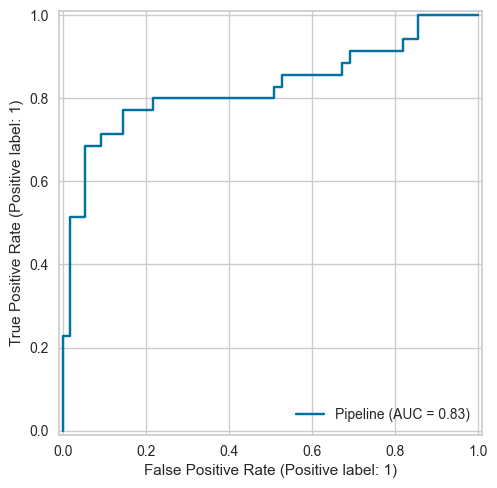

In [88]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test);

## XGBoost: Extreme Gradient Boosting Modelling and Model Performance

In [89]:
from xgboost import XGBClassifier

In [90]:

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

# Pipeline oluşturulması
XGBClassifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])


In [91]:
XGBClassifier_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [92]:
eval_metric(XGBClassifier_model, X_train, y_train, X_test, y_test)

Test_Set
[[50  5]
 [13 22]]
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        55
           1       0.81      0.63      0.71        35

    accuracy                           0.80        90
   macro avg       0.80      0.77      0.78        90
weighted avg       0.80      0.80      0.79        90


Train_Set
[[491   3]
 [ 15 292]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       494
           1       0.99      0.95      0.97       307

    accuracy                           0.98       801
   macro avg       0.98      0.97      0.98       801
weighted avg       0.98      0.98      0.98       801



## XGBClassifier Cv

In [93]:
XGBClassifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

scores = cross_validate(
    model,
    X_train,
    y_train,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.825216
train_accuracy     0.911084
test_precision     0.827262
train_precision    0.940260
test_recall        0.694301
train_recall       0.820105
test_f1            0.751474
train_f1           0.876014
test_roc_auc       0.868857
train_roc_auc      0.963442
dtype: float64

## XGBClassifier_model GridgSearch

In [94]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

params = pipeline.get_params()
print(params)


{'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                ('categorical',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'Embarked'])])), ('classifier', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_t

In [95]:
params = {
    'preprocessor__numeric__with_mean': [True, False],
    'preprocessor__categorical__handle_unknown': ['error', 'ignore'],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__n_estimators': [50, 100, 200],
}


In [96]:
XGBClassifier_grid= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

In [97]:
xgb_grid = GridSearchCV(XGBClassifier_grid,
                        params,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [98]:
xgb_grid.estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [99]:
xgb_grid.best_params_


{'classifier__learning_rate': 0.05,
 'classifier__n_estimators': 50,
 'preprocessor__categorical__handle_unknown': 'error',
 'preprocessor__numeric__with_mean': True}

In [100]:
xgb_grid.best_score_

0.7453514773375873

In [101]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[51  4]
 [13 22]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        55
           1       0.85      0.63      0.72        35

    accuracy                           0.81        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.82      0.81      0.80        90


Train_Set
[[474  20]
 [ 67 240]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       494
           1       0.92      0.78      0.85       307

    accuracy                           0.89       801
   macro avg       0.90      0.87      0.88       801
weighted avg       0.89      0.89      0.89       801



In [102]:
y_pred = xgb_grid.predict(X_test)
XGB_R2 = r2_score(y_test, y_pred)
XGB_mae = mean_absolute_error(y_test, y_pred)
XGB_mse = mean_squared_error(y_test, y_pred)
XGB_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_val(xgb_grid, X_train, y_train, X_test, y_test)

,train,test
R2,0.540499,0.205195
mae,0.108614,0.188889
mse,0.108614,0.188889
rmse,0.329567,0.434613


## Feature Importances

In [103]:

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

from xgboost import XGBClassifier




# Pipeline oluşturulması
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',XGBClassifier(learning_rate=0.05, n_estimators=50, 
              preprocessor__categorical__handle_unknown='error', 
              preprocessor__numeric__with_mean=True)
 )
])

# Modelin eğitilmesi
model.fit(X_train, y_train)

# Özellik önemlerinin alınması
XGBClassifier = model.named_steps['classifier'].feature_importances_

# Özellik önemlerinin bir DataFrame'e dönüştürülmesi
feats = pd.DataFrame(data=XGBClassifier, index=data.columns, columns=['XGBClassifier_importance'])

# Özellik önemlerinin sıralanması
XGBClassifier_imp_feats = feats.sort_values("XGBClassifier_importance", ascending=False)
XGBClassifier_imp_feats

,XGBClassifier_importance
Parch,0.749637
Survived,0.134243
Sex,0.034660
Age,0.024975
SibSp,0.021315
Pclass,0.018590
Embarked,0.012548
Fare,0.004031


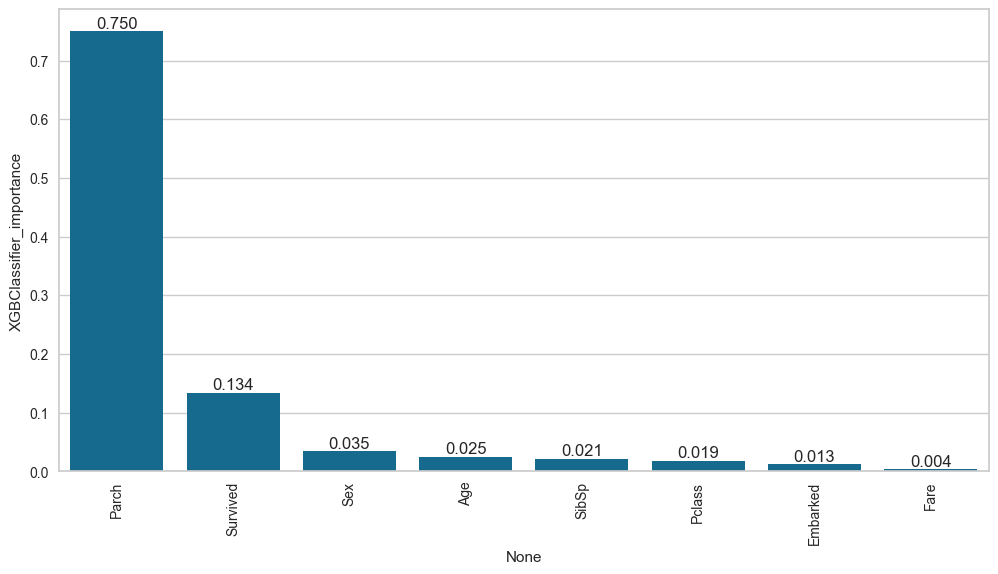

In [104]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=XGBClassifier_imp_feats, x=XGBClassifier_imp_feats.index, y='XGBClassifier_importance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

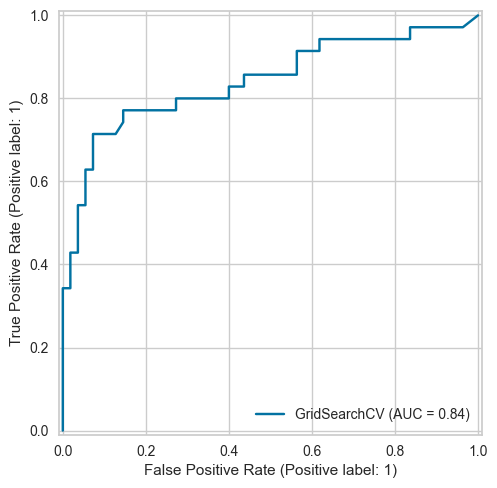

In [105]:
RocCurveDisplay.from_estimator(xgb_grid, X_test, y_test);

## Light GBM

In [106]:
from lightgbm import LGBMClassifier

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)


# Pipeline oluşturulması
LGBMClassifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier',LGBMClassifier(random_state=42))
])

In [108]:
LGBMClassifier_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LGBMClassifier(random_state=42))])

In [109]:
eval_metric(LGBMClassifier_model, X_train, y_train, X_test, y_test)

Test_Set
[[49  6]
 [13 22]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        55
           1       0.79      0.63      0.70        35

    accuracy                           0.79        90
   macro avg       0.79      0.76      0.77        90
weighted avg       0.79      0.79      0.78        90


Train_Set
[[483  11]
 [ 23 284]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       494
           1       0.96      0.93      0.94       307

    accuracy                           0.96       801
   macro avg       0.96      0.95      0.95       801
weighted avg       0.96      0.96      0.96       801



## LGBMClassifier Cv

In [110]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

# Pipeline oluşturulması
LGBMClassifier_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

scores = cross_validate(
    LGBMClassifier_model,
    X_train,
    y_train,
    scoring=["accuracy", "precision", "recall", "f1", "roc_auc"],
    cv=10,
    return_train_score=True
)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]


[LightGBM] [Info] Number of positive: 276, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383333 -> initscore=-0.475424
[LightGBM] [Info] Start training from score -0.475424
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


test_accuracy      0.825262
train_accuracy     0.957692
test_precision     0.810758
train_precision    0.962070
test_recall        0.716882
train_recall       0.926175
test_f1            0.756945
train_f1           0.943763
test_roc_auc       0.869372
train_roc_auc      0.994415
dtype: float64

## LGBMClassifier GridSearch 

In [111]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

params = pipeline.get_params()
params

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                    Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                   ('categorical',
                                    OneHotEncoder(drop='first',
                                                  handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['Sex', 'Embarked'])])),
  ('classifier', LGBMClassifier(random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                 ('categorical',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                         

In [112]:
params = {
    'classifier__learning_rate': [0.1, .5, .75],
    'classifier__n_estimators': [50,100,200],
    'classifier__max_depth': [-1,1],
}

LGBMClassifier_grid= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42))
])

lgbm_grid = GridSearchCV(LGBMClassifier_grid,
                        params,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [113]:
lgbm_grid.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': -1,
 'classifier__n_estimators': 50}

In [114]:
lgbm_grid.estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked'])])),
                ('classifier', LGBMClassifier(random_state=42))])

In [115]:
lgbm_grid.best_score_

0.756150633298024

In [116]:
y_pred = lgbm_grid.predict(X_test)

lgbm_f1 = f1_score(y_test, y_pred)
lgbm_recall = recall_score(y_test, y_pred)
lgbm_auc = roc_auc_score(y_test, y_pred)

eval_metric(lgbm_grid, X_train, y_train, X_test, y_test)

Test_Set
[[50  5]
 [10 25]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        55
           1       0.83      0.71      0.77        35

    accuracy                           0.83        90
   macro avg       0.83      0.81      0.82        90
weighted avg       0.83      0.83      0.83        90


Train_Set
[[464  30]
 [ 44 263]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       494
           1       0.90      0.86      0.88       307

    accuracy                           0.91       801
   macro avg       0.91      0.90      0.90       801
weighted avg       0.91      0.91      0.91       801



In [117]:
y_pred = lgbm_grid.predict(X_test)
LGBM_R2 = r2_score(y_test, y_pred)
LGBM_mae = mean_absolute_error(y_test, y_pred)
LGBM_mse = mean_squared_error(y_test, y_pred)
LGBM_rmse = mean_squared_error(y_test, y_pred, squared=False)
train_val(lgbm_grid, X_train, y_train, X_test, y_test)

,train,test
R2,0.609160,0.298701
mae,0.092385,0.166667
mse,0.092385,0.166667
rmse,0.303948,0.408248


## LGBMClassifier Feature Importances

In [118]:

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_columns),
        ('categorical', OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False), object_columns)
    ]
)

# Pipeline oluşturulması
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(learning_rate = 0.1, n_estimators = 50))
])

# Modelin eğitilmesi
model.fit(X_train, y_train)

# Özellik önemlerinin alınması
LGBMClassifierfeature_importances = model.named_steps['classifier'].feature_importances_

# Özellik önemlerinin bir DataFrame'e dönüştürülmesi
feats = pd.DataFrame(data=LGBMClassifierfeature_importances, index=data.columns, columns=['LGBMClassifierimportance'])

# Özellik önemlerinin sıralanması
LGBMClassifierimp_feats = feats.sort_values("LGBMClassifierimportance", ascending=False)
LGBMClassifierimp_feats

[LightGBM] [Info] Number of positive: 307, number of negative: 494
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383271 -> initscore=-0.475688
[LightGBM] [Info] Start training from score -0.475688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,LGBMClassifierimportance
SibSp,619
Pclass,591
Survived,67
Sex,66
Parch,51
Age,39
Embarked,34
Fare,2


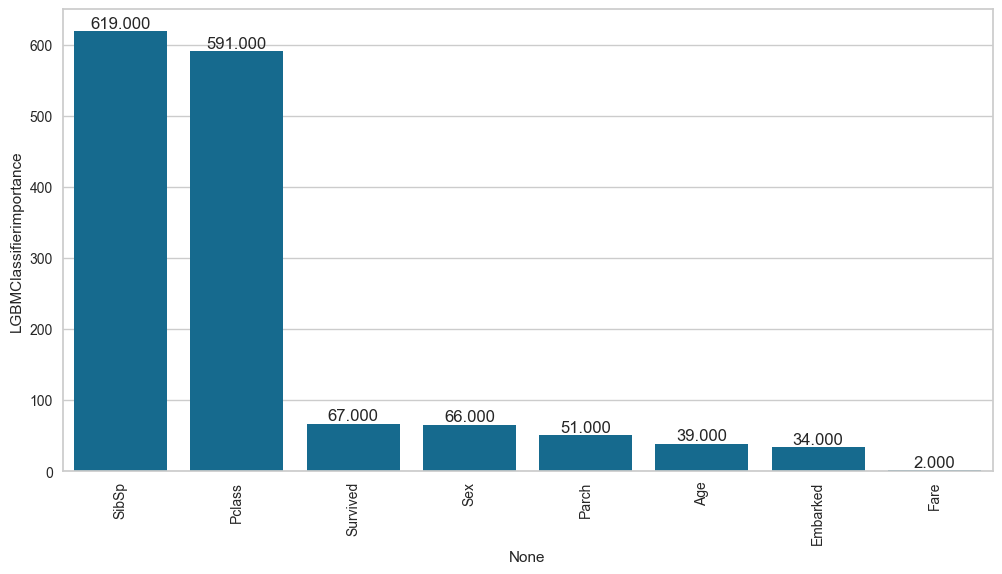

In [119]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=LGBMClassifierimp_feats, x=LGBMClassifierimp_feats.index, y='LGBMClassifierimportance')
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.xticks(rotation=90);

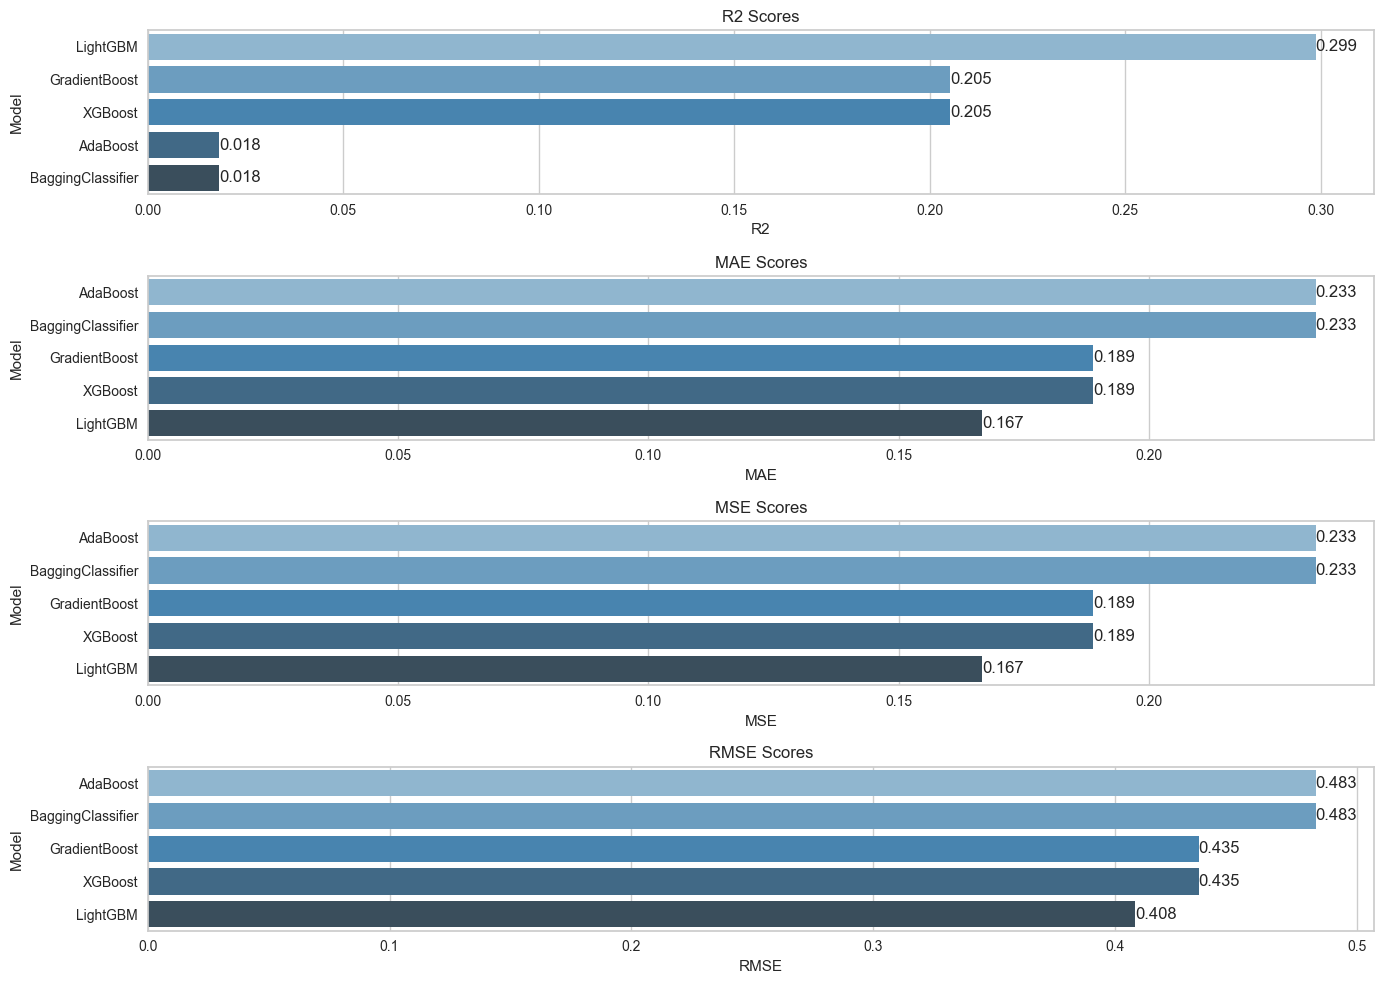

In [120]:
# Yeni DataFrame oluşturma
compare = pd.DataFrame({"Model": ["AdaBoost", "GradientBoost", "XGBoost", "LightGBM", "BaggingClassifier"],
                        "R2": [ada_R2, grad_R2, XGB_R2, LGBM_R2, BaggingClassifier_model_R2],
                        "MAE": [ada_mae, grad_mae, XGB_mae, LGBM_mae, BaggingClassifier_model_mae],
                        "MSE": [ada_mse, grad_mse, XGB_mse, LGBM_mse, BaggingClassifier_model_mse],
                        "RMSE": [ada_rmse, grad_rmse, XGB_rmse, LGBM_rmse, BaggingClassifier_model_rmse]})

# Grafik çizimi
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        
        ax.text(width,                              
                p.get_y() + p.get_height() / 2,     
                '{:.3f}'.format(width),             
                ha='left',                         
                va='center')                       
    
plt.figure(figsize=(14, 10))

plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax = sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('R2 Scores')

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=False)
ax = sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MAE Scores')

plt.subplot(413)
compare = compare.sort_values(by="MSE", ascending=False)
ax = sns.barplot(x="MSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('MSE Scores')

plt.subplot(414)
compare = compare.sort_values(by="RMSE", ascending=False)
ax = sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.title('RMSE Scores')

plt.tight_layout()
plt.show()
